In [1]:
# Install pandas_datareader if not already installed
%pip install --upgrade nbformat


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline



In [3]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()


Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.764324,35.662958,27.081049,29.246882,855215656
2007-10-08,31.087032,33.871675,30.891618,33.871675,126671715
2007-10-09,33.204002,33.497122,29.426009,31.103307,116725709
2007-10-10,33.513405,34.197353,33.220286,34.067076,67931378
2007-10-11,37.258831,39.082690,33.220288,39.082690,106320954


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [6]:
df.isnull().sum()


Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [7]:
df.describe()


Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,80.182832,81.225242,79.153128,80.220121,1.188963e+07
std,64.365734,65.118008,63.564661,64.347148,2.061999e+07
min,19.129536,20.448814,17.150619,20.349867,0.000000e+00
25%,36.774819,37.354988,36.231700,36.812473,4.799653e+06
50%,55.878258,56.523446,55.130445,55.985541,8.344398e+06
75%,83.671991,84.670735,82.679821,83.694741,1.362032e+07
max,360.278564,361.067223,352.145309,358.898352,8.552157e+08


In [8]:
df = df.reset_index()


In [9]:
df.columns


MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [10]:
df.to_csv("powergrid.csv")


In [11]:
data01 = pd.read_csv("powergrid.csv")



In [12]:
data01.head()


,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.76432418823242,35.66295790351814,27.08104880255562,29.246882194513173,855215656
2,1,2007-10-08,31.087032318115234,33.871674504841586,30.891617978838802,33.871674504841586,126671715
3,2,2007-10-09,33.204002380371094,33.49712160074298,29.42600904713393,31.10330653573289,116725709
4,3,2007-10-10,33.513404846191406,34.19735260508341,33.22028564022043,34.06707568453646,67931378


In [13]:
# Candlesticks 
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'], 
                                    high = data01['High'],
                                    low = data01['Low'], 
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [16]:
df = df.drop(['Date'], axis = 1)


C:\Users\admin\AppData\Local\Temp\ipykernel_7568\3534138121.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [17]:
df.head()


Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.764324,35.662958,27.081049,29.246882,855215656
1,31.087032,33.871675,30.891618,33.871675,126671715
2,33.204002,33.497122,29.426009,31.103307,116725709
3,33.513405,34.197353,33.220286,34.067076,67931378
4,37.258831,39.082690,33.220288,39.082690,106320954


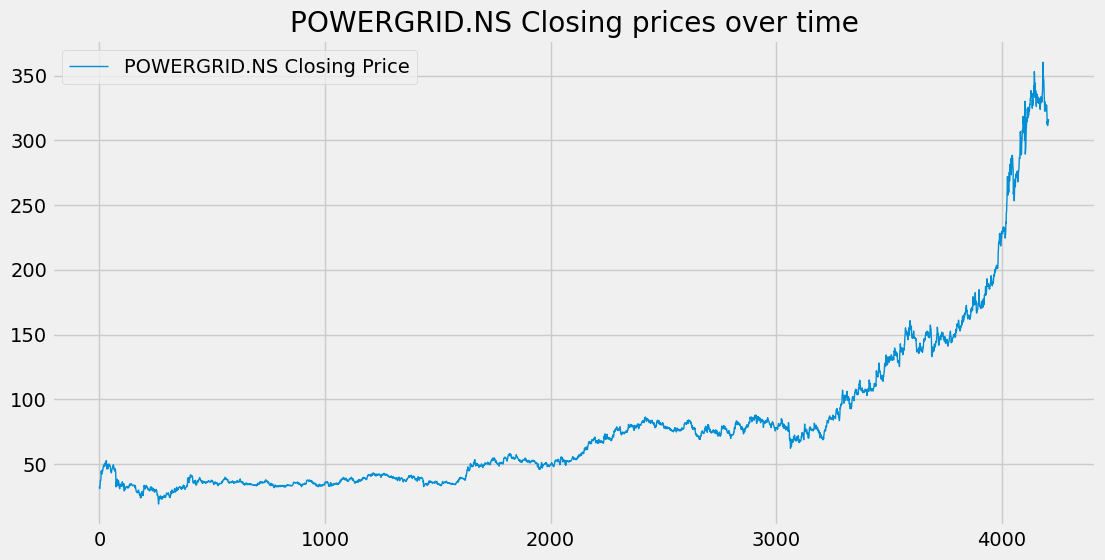

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

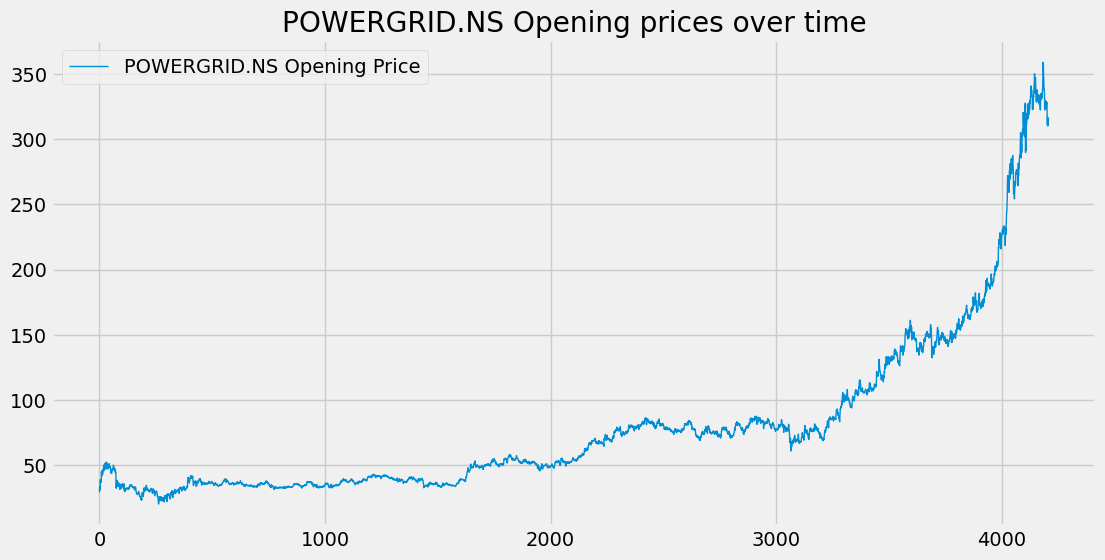

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

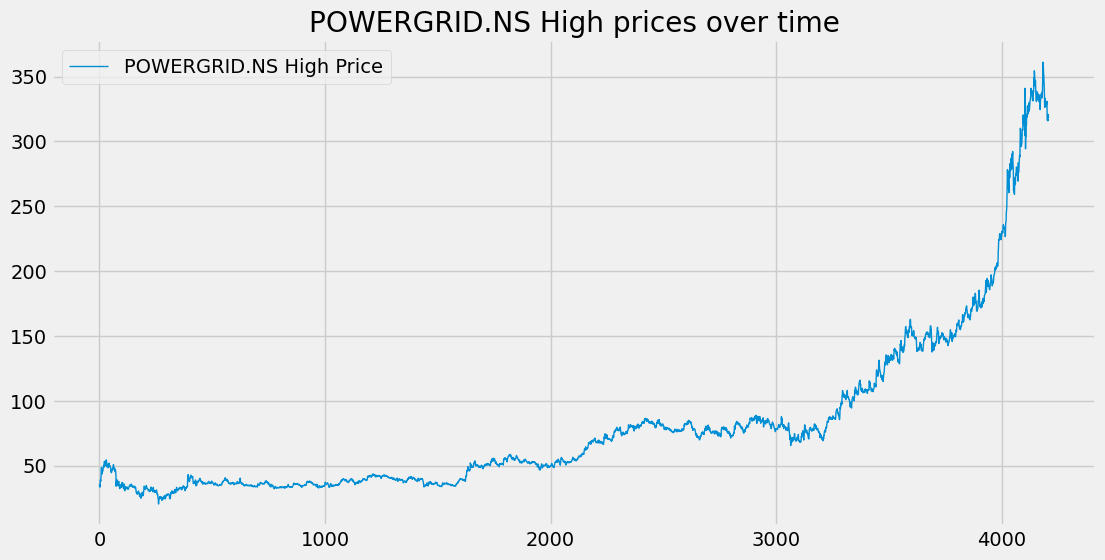

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

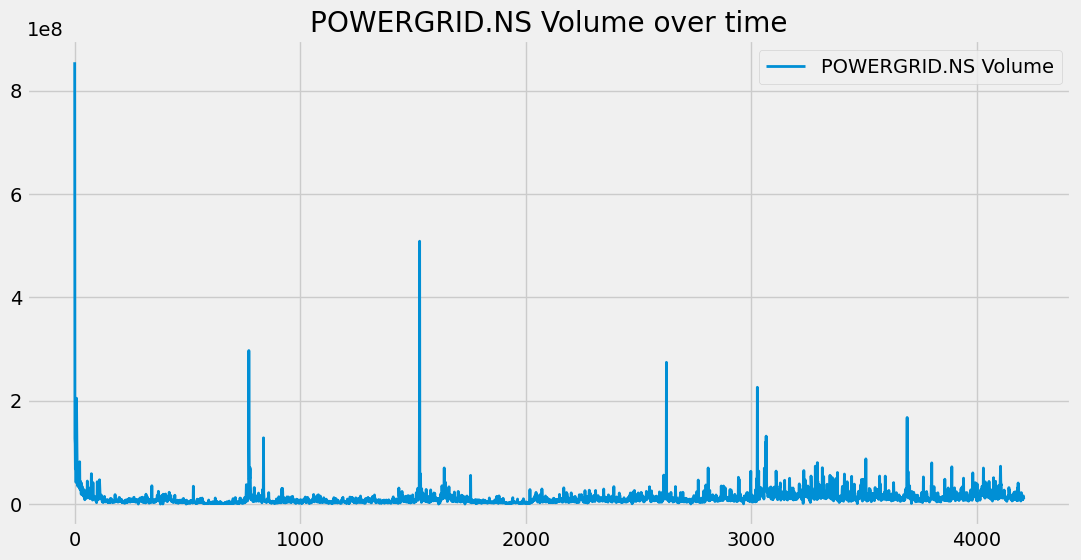

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [22]:


temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [23]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [24]:
df01.rolling(5).mean()


,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [25]:
ma100 = df.Close.rolling(100).mean()


In [26]:
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,328.794317
4204,329.038712
4205,329.277425
4206,329.479302


In [27]:
ma200 = df.Close.rolling(200).mean()


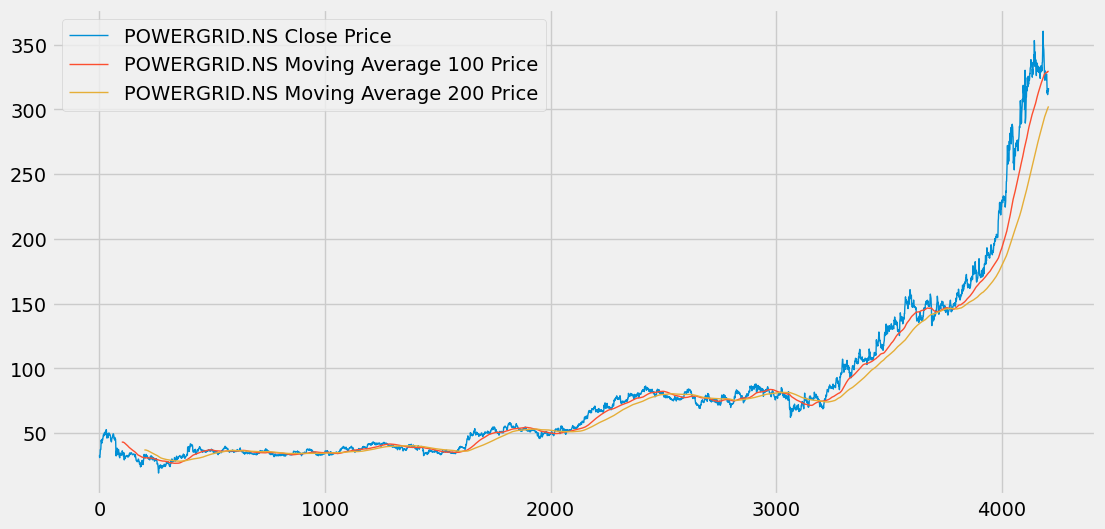

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [29]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()


In [30]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()


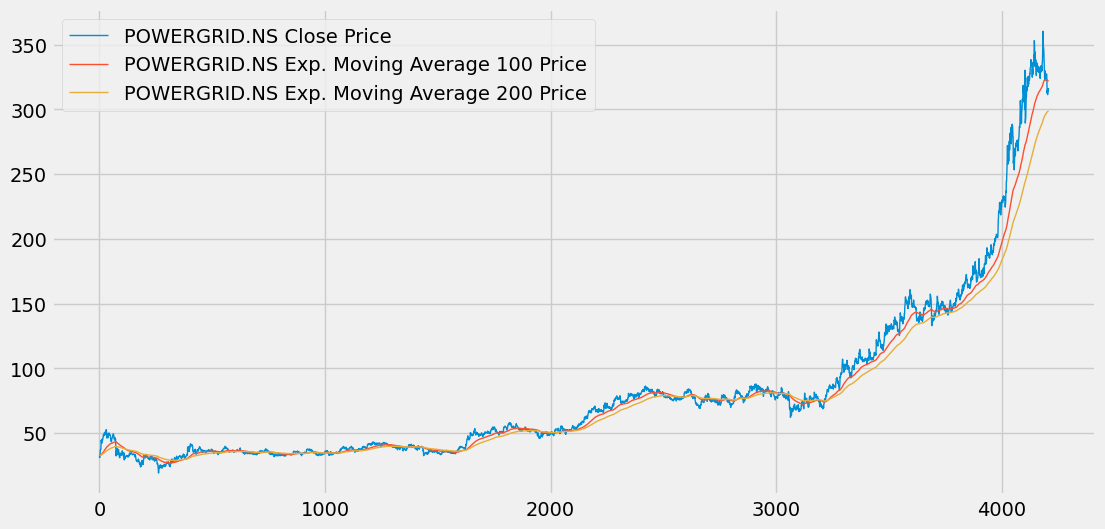

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [32]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [37]:
data_training_array = scaler.fit_transform(data_training)


In [38]:
data_training_array


array([[0.1980861 ],
       [0.17371841],
       [0.20447374],
       ...,
       [0.90774428],
       [0.86000359],
       [0.87299634]])

In [39]:
data_training_array.shape[0]



2945

In [40]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [44]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [45]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\admin\Desktop\machine learning\PROJECTS\STOCK-PREDICTION\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [46]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - loss: 0.0815
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 0.0080
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 0.0067
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - loss: 0.0068
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - loss: 0.0065
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 0.0061
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - loss: 0.0055
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 0.0055
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - loss: 0.0046
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 0.0046
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - loss: 0.0051
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - loss: 0.0047
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - loss: 0.0038
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - loss: 0.0049
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - loss

In [52]:
past_100_days = data_training.tail(100)


In [54]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [55]:
final_df.head()


Ticker,POWERGRID.NS
0,76.617523
1,78.179459
2,78.446632
3,78.282227
4,78.734360


In [56]:
input_data = scaler.fit_transform(final_df)


In [57]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [58]:
y_predicted = model.predict(x_test)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step


In [59]:
scaler.scale_


array([0.00335446])

In [60]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

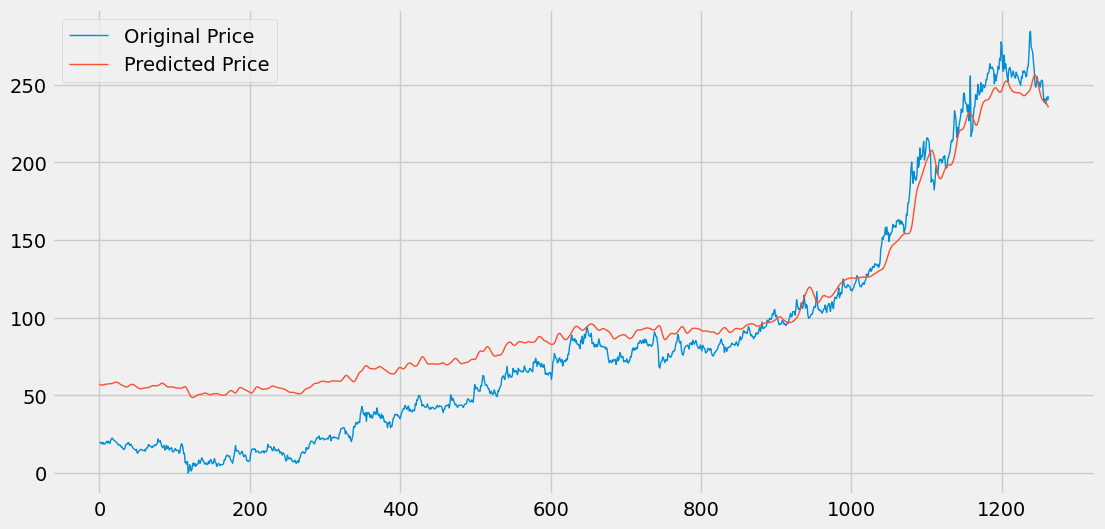

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [62]:
model.save('stock_dl_model.h5')


UsageError: Line magic function `%mlflow` not found.
